In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

import collections
import itertools

import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import statsmodels
import statsmodels.api as sm
#print(statsmodels.__version__)

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

from xgboost import XGBRegressor

#Model interpretation modules
import eli5
import lime
import lime.lime_tabular
import shap
shap.initjs()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#LOAD DATA

In [3]:
Combined_data = pd.read_csv('../../raw_data/sfo/listings.csv')
Combined_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,132,2,257,2020-07-30,1.91,1,177
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.81,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.14,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2018-09-12,0.11,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,750,5,28,2019-06-28,0.21,2,365


In [4]:
print('Number of features: {}'.format(Combined_data.shape[1]))
print('Number of examples: {}'.format(Combined_data.shape[0]))

Number of features: 16
Number of examples: 7274


In [5]:
Combined_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
Combined_data['last_review'] = pd.to_datetime(Combined_data['last_review'],infer_datetime_format=True) 

In [7]:
Combined_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.769310,-122.433860,Entire home/apt,132,2,257,2020-07-30,1.91,1,177
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.745110,-122.421020,Entire home/apt,235,30,111,2017-08-06,0.81,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.765550,-122.452130,Private room,56,32,19,2020-03-06,0.14,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.765550,-122.452130,Private room,56,32,8,2018-09-12,0.11,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.775250,-122.436370,Entire home/apt,750,5,28,2019-06-28,0.21,2,365
5,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.760300,-122.421970,Private room,169,1,736,2020-03-16,5.47,2,179
6,9225,Artful Potrero Separate Floor with Garden,29674,Gae,NaN,Potrero Hill,37.762590,-122.405430,Private room,150,1,531,2020-02-08,4.03,1,349
7,10251,Victorian Suite in Inner Mission,35199,Roman & Sarah,NaN,Mission,37.758310,-122.413860,Entire home/apt,200,30,337,2019-05-27,2.53,1,365
8,10578,Classic Nob Hill Studio - Roof Deck,37049,Andrew,NaN,Nob Hill,37.791430,-122.415440,Entire home/apt,120,30,18,2015-05-17,0.17,1,364
9,10820,Haight Buena Vista Park Garden 3BR,38836,Bernat,NaN,Haight Ashbury,37.771870,-122.438590,Entire home/apt,170,30,37,2018-12-01,0.28,38,22


In [8]:
#MISSING DATA

In [9]:
total = Combined_data.isnull().sum().sort_values(ascending=False)

percent = (Combined_data.isnull().sum())/Combined_data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)

missing_data.head(40)

,Total,Percent
neighbourhood_group,7274,1.000000
reviews_per_month,1720,0.236459
last_review,1720,0.236459
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000
longitude,0,0.000000


In [10]:
Combined_data =  Combined_data.drop('neighbourhood_group',1)

Combined_data['reviews_per_month'] = Combined_data['reviews_per_month'].fillna(0)

earliest = min(Combined_data['last_review'])
Combined_data['last_review'] = Combined_data['last_review'].fillna(earliest)
Combined_data['last_review'] = Combined_data['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

In [12]:
total = Combined_data.isnull().sum().sort_values(ascending=False)

percent = (Combined_data.isnull().sum())/Combined_data.isnull().count().sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
availability_365,0,0.0
calculated_host_listings_count,0,0.0
reviews_per_month,0,0.0
last_review,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
price,0,0.0
room_type,0,0.0
longitude,0,0.0
latitude,0,0.0


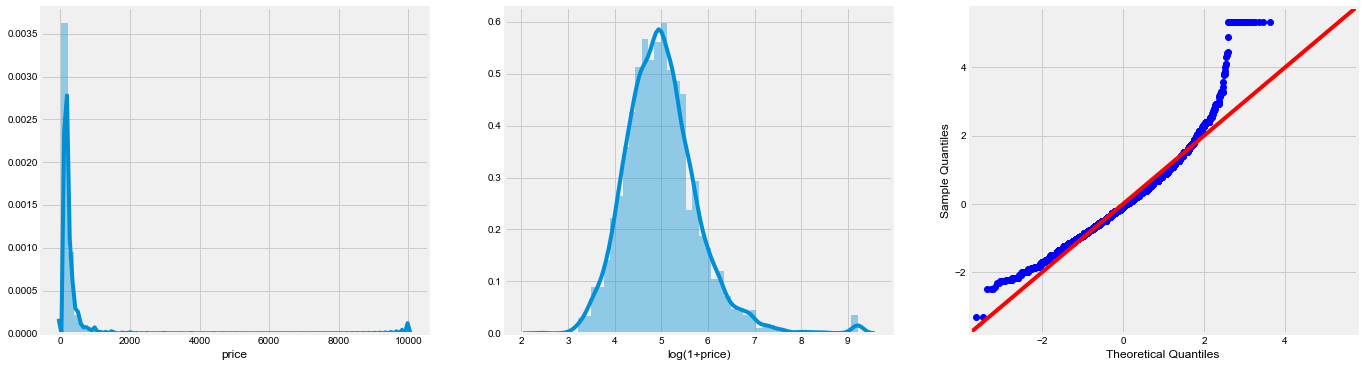

In [14]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(Combined_data['price'], ax=axes[0])
sns.distplot(np.log1p(Combined_data['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(Combined_data['price']), stats.norm, fit=True, line='45', ax=axes[2]);

In [15]:
Combined_data = Combined_data[np.log1p(Combined_data['price']) < 8]
Combined_data = Combined_data[np.log1p(Combined_data['price']) > 3]

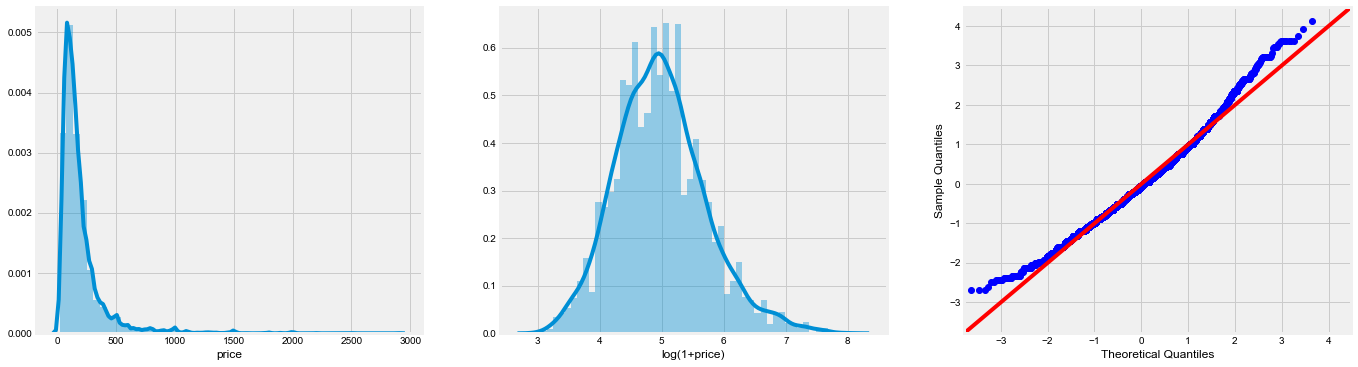

In [16]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(Combined_data['price'], ax=axes[0])
sns.distplot(np.log1p(Combined_data['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(Combined_data['price']), stats.norm, fit=True, line='45', ax=axes[2]);

In [17]:
Combined_data['price'] = np.log1p(Combined_data['price'])

In [18]:
#PREDICTOR DISTRIBUTIONS

In [19]:
print(Combined_data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [20]:
Combined_data = Combined_data.drop(['host_id', 'id'], axis=1)

In [21]:
Combined_data['minimum_nights'] = np.log1p(Combined_data['minimum_nights'])

In [22]:
Combined_data['reviews_per_month'] = Combined_data[Combined_data['reviews_per_month'] < 17.5]['reviews_per_month']

In [23]:
Combined_data['all_year_avail'] = Combined_data['availability_365']>353
Combined_data['low_avail'] = Combined_data['availability_365']< 12
Combined_data['no_reviews'] = Combined_data['reviews_per_month']==0

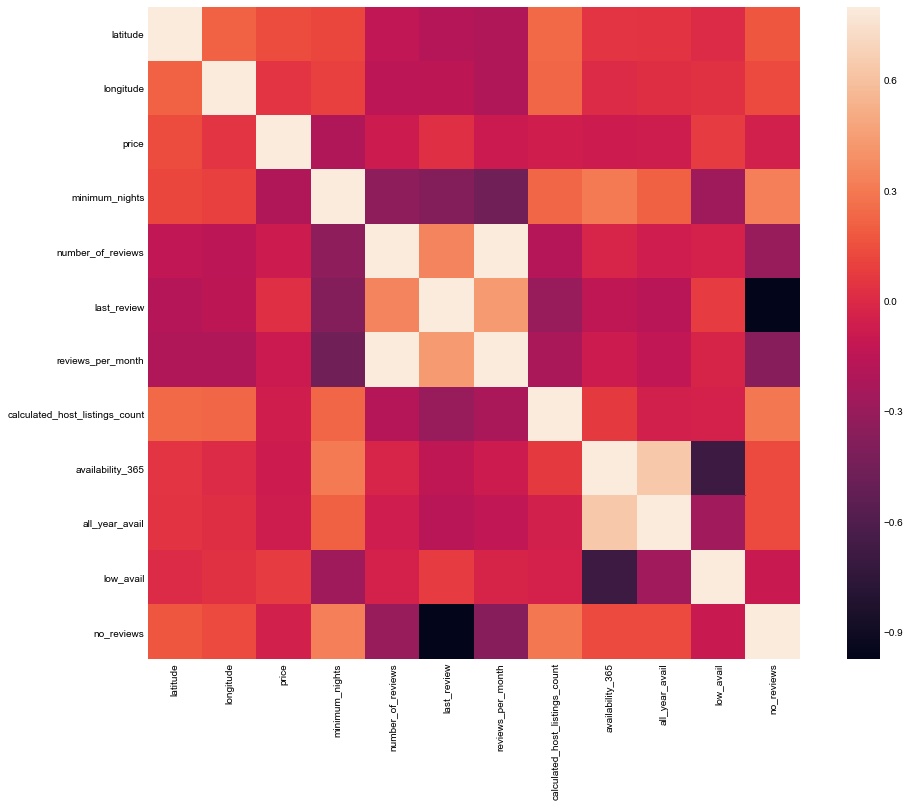

In [24]:
corrmatrix = Combined_data.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True)
sns.set(font_scale=0.8)

In [25]:
categorical_features = Combined_data.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (7226, 4)


In [26]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

,name_!G Ground room 2 twin size beds share bath,name_!W Ground room W w/private bathroom,"name_""Designer Showplace Home"" in the Marina","name_""THE CAROUSEL ROOM"" in the CASTRO--Convenient!","name_""The apartment is awesome...""",name_# Misfit Manor Private Lux Studio Apt. W Garden/Hammock BART,name_#1 Jackson Columbus Montgomery private 2 bedrooms,name_#1 Nob Hill King room and Q sofa bed private bath,name_#1 Private room with private bathroom with tub,name_#1 SF sunset 24th ave& kirkham st Deluxe king room,...,neighbourhood_South of Market,neighbourhood_Treasure Island/YBI,neighbourhood_Twin Peaks,neighbourhood_Visitacion Valley,neighbourhood_West of Twin Peaks,neighbourhood_Western Addition,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [27]:
Combined_data['reviews_per_month'] = Combined_data['reviews_per_month'].fillna(0)

In [28]:
numerical_features =  Combined_data.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))

Numerical features: (7226, 11)


In [30]:
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
X_df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

In [31]:
Processed_data = pd.concat([X_df, y], axis = 1)
Processed_data.to_csv('NYC_Airbnb_Processed.dat')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (5780, 8935)
Dimensions of the training target vector: (5780,)
Dimensions of the test feature matrix: (1446, 8935)
Dimensions of the test target vector: (1446,)


In [36]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
n_folds = 5

# squared_loss
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [38]:
for Model in [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
    if Model == XGBRegressor: cv_res = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = rmse_cv(Model())
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))

LinearRegression: 15835863494639759360.00000 +/- 22879130611705774080.000000
Ridge: 0.22331 +/- 0.009879
Lasso: 0.52167 +/- 0.017224
ElasticNet: 0.52167 +/- 0.017224
RandomForestRegressor: 0.20900 +/- 0.009378
XGBRegressor: 0.19751 +/- 0.009543
HuberRegressor: 0.24567 +/- 0.009681
